In [2]:
import pandas as pd
df = pd.read_excel('walmart Retail Data.xlsx')
print(df.head())

         City  Customer Age      Customer Name Customer Segment  Discount  \
0  McKeesport           NaN     Jessica Myrick   Small Business      0.10   
1       Bowie           NaN     Matt Collister      Home Office      0.08   
2        Napa           NaN  Alan Schoenberger        Corporate      0.00   
3  Montebello           NaN  Elizabeth Moffitt         Consumer      0.08   
4        Napa           NaN  Alan Schoenberger        Corporate      0.07   

   Number of Records Order Date  Order ID Order Priority  Order Quantity  ...  \
0                  1 2012-01-01     28774           High              32  ...   
1                  1 2012-01-01     13729  Not Specified               9  ...   
2                  1 2012-01-02     37537            Low               4  ...   
3                  1 2012-01-02     44069       Critical              43  ...   
4                  1 2012-01-02     37537            Low              43  ...   

    Profit Region Row ID    Sales  Ship Date      

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert to datetime


In [4]:
df.columns

Index(['City', 'Customer Age', 'Customer Name', 'Customer Segment', 'Discount',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Product Base Margin', 'Product Category',
       'Product Container', 'Product Name', 'Product Sub-Category', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price', 'Zip Code'],
      dtype='object')

In [5]:
from statsmodels.tsa.stattools import adfuller

time_series = df['Sales']

adf_result = adfuller(time_series)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -88.37214147310662
p-value: 0.0


In [7]:
specific_columns = ['Order Date', 'Sales']  # Specify the columns to keep
new_df = df[specific_columns]

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [9]:
new_df.head()

,Order Date,Sales
0,2012-01-01,180.36
1,2012-01-01,872.48
2,2012-01-02,1239.06
3,2012-01-02,614.80
4,2012-01-02,4083.19


In [10]:
# Extract 'Order Date' and 'Sales' columns
df = df[['Order Date', 'Sales']]

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sort by date to ensure chronological order
df = df.sort_values(by='Order Date')

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

print("\nProcessed Data:")
print(df.head())


Processed Data:
              Sales
Order Date         
2012-01-01   180.36
2012-01-01   872.48
2012-01-02  1239.06
2012-01-02   614.80
2012-01-02  4083.19


In [11]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())




Missing Values:
Sales    0
dtype: int64


In [12]:
# Fill or drop missing values if any
df['Sales'].fillna(df['Sales'].mean(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6888\3743071670.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].mean(), inplace=True)


## Historical sales data

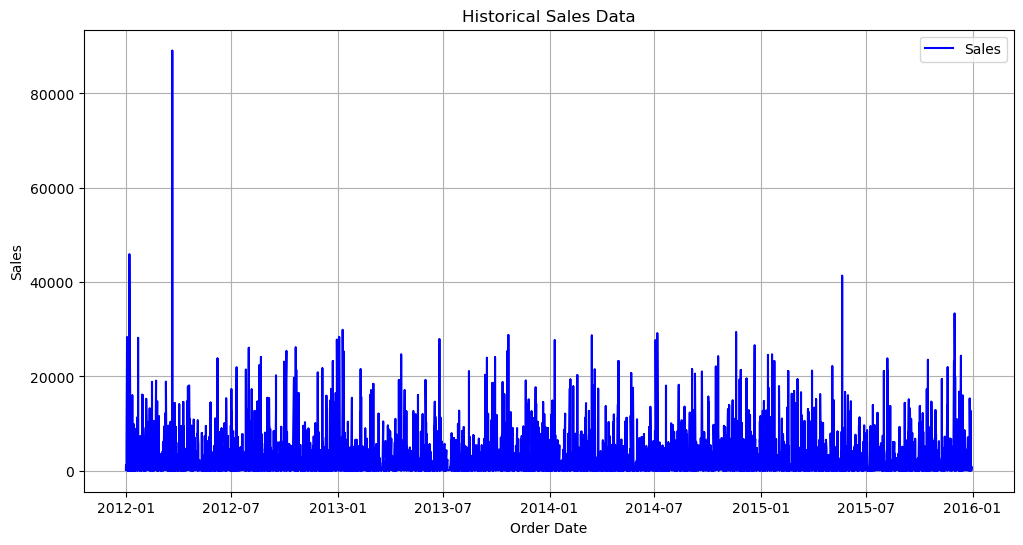

In [13]:
# Plot the sales data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Sales', color='blue')
plt.title('Historical Sales Data')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


In [14]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [15]:
# Define the SARIMA model
model = SARIMAX(train['Sales'],
                order=(1, 1, 1), # (p, d, q) - Adjust these parameters based on data
                seasonal_order=(1, 1, 1, 12)) # (P, D, Q, S) for seasonality

results = model.fit()

# Print summary of the model
print("\nSARIMA Model Summary:")
print(results.summary())


C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                 6719
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -64757.261
Date:                            Sun, 12 Jan 2025   AIC                         129524.522
Time:                                    11:56:57   BIC                         129558.576
Sample:                                         0   HQIC                        129536.281
                                           - 6719                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0039      0.016      0.240      0.810      -0.028       0.036
ma.L1       

In [1]:
import pandas as pd
df = pd.read_excel('walmart Retail Data.xlsx')


C:\Users\DELL\AppData\Local\Temp\ipykernel_6888\1867678543.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\DELL\AppData\Local\Temp\ipykernel_6888\1867678543.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(monthly_sales.index[-1], periods=12, freq='M')


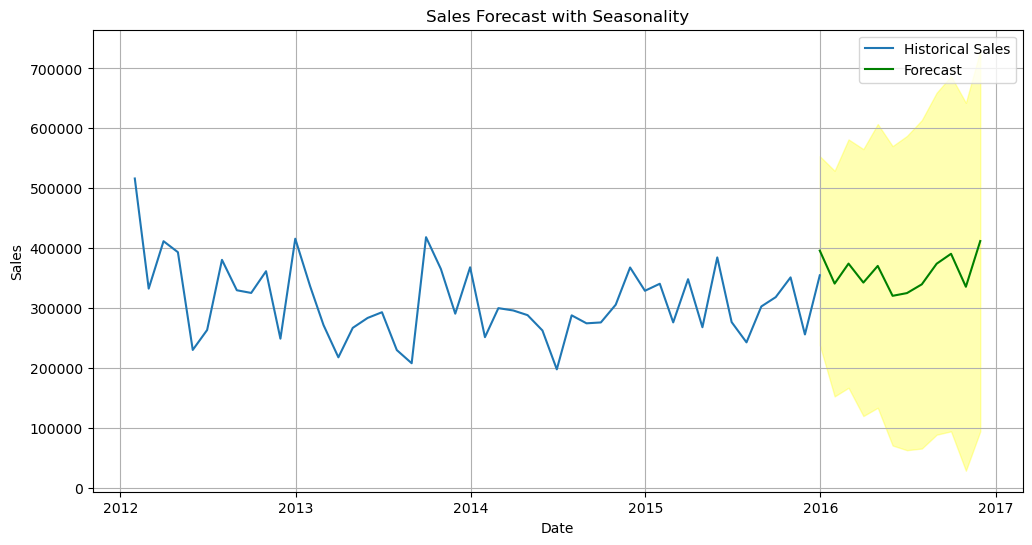

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


model = SARIMAX(monthly_sales,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit()


forecast = sarima_fit.get_forecast(steps=12)
forecast_index = pd.date_range(monthly_sales.index[-1], periods=12, freq='M')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_index, forecast_values, label='Forecast', color='green')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='yellow', alpha=0.3)
plt.title('Sales Forecast with Seasonality')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

## oulier detection

In [23]:
import pandas as pd
df=pd.read_excel("walmart Retail Data.xlsx")
df.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


In [24]:
df.columns

Index(['City', 'Customer Age', 'Customer Name', 'Customer Segment', 'Discount',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Product Base Margin', 'Product Category',
       'Product Container', 'Product Name', 'Product Sub-Category', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price', 'Zip Code'],
      dtype='object')

In [25]:
df.describe()

,Customer Age,Discount,Number of Records,Order Date,Order ID,Order Quantity,Product Base Margin,Profit,Row ID,Sales,Ship Date,Shipping Cost,Unit Price,Zip Code
count,7496.000000,8399.000000,8399.0,8399,8399.000000,8399.000000,8336.000000,8399.000000,8399.000000,8399.000000,8399,8399.000000,8399.000000,8399.000000
mean,54.542823,0.049671,1.0,2013-12-24 18:31:30.225026560,29965.179783,25.571735,0.512513,181.184422,4200.000000,1775.878179,2013-12-26 19:17:37.411596544,12.838557,89.346259,52839.139421
min,41.000000,0.000000,1.0,2012-01-01 00:00:00,3.000000,1.000000,0.350000,-14140.701600,1.000000,2.240000,2012-01-02 00:00:00,0.490000,0.990000,1001.000000
25%,47.000000,0.020000,1.0,2012-12-20 00:00:00,15011.500000,13.000000,0.380000,-83.315000,2100.500000,143.195000,2012-12-22 12:00:00,3.300000,6.480000,30337.000000
50%,53.000000,0.050000,1.0,2013-12-17 00:00:00,29857.000000,26.000000,0.520000,-1.500000,4200.000000,449.420000,2013-12-18 00:00:00,6.070000,20.990000,52732.000000
75%,61.000000,0.080000,1.0,2015-01-01 12:00:00,44596.000000,38.000000,0.590000,162.748000,6299.500000,1709.320000,2015-01-03 12:00:00,13.990000,85.990000,77577.000000
max,95.000000,0.250000,1.0,2015-12-30 00:00:00,59973.000000,50.000000,0.850000,27220.690000,8399.000000,89061.050000,2015-12-30 00:00:00,164.730000,6783.020000,99362.000000
std,9.519435,0.031823,0.0,NaN,17260.883447,14.481071,0.135589,1196.653326,2424.726789,3585.050525,NaN,17.264052,290.354383,28509.535635


In [26]:
df=df.sort_values(by='Sales', ascending=True)

In [27]:
df.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
5486,Lincoln Park,56.0,Ricardo Emerson,Corporate,0.01,1,2014-08-07,6374,Critical,1,...,-1.9700,Central,889,2.24,2014-08-09,Regular Air,0.70,Michigan,1.48,48146
6052,Bozeman,59.0,Ken Dana,Small Business,0.09,1,2014-11-19,25318,Critical,1,...,-3.1625,West,3553,3.20,2014-11-21,Regular Air,1.49,Montana,1.88,59715
3178,Kingman,48.0,Benjamin Patterson,Corporate,0.06,1,2013-07-03,23361,Critical,2,...,-2.7300,West,3263,3.23,2013-07-04,Regular Air,0.70,Arizona,1.26,86401
2273,Lancaster,45.0,Adam Hart,Corporate,0.06,1,2013-01-22,49925,High,1,...,-1.7800,West,6987,3.41,2013-01-23,Regular Air,0.70,California,2.88,93534
644,Fort Lee,NaN,Andy Reiter,Corporate,0.05,1,2012-04-13,9635,Critical,1,...,-2.9095,East,1314,3.42,2012-04-15,Regular Air,1.49,New Jersey,1.88,7024


In [29]:
# Detect outliers using standard deviation
import numpy as np
mean = np.mean(df['Sales'])
std_dev = np.std(df['Sales'])

lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

outliers = [x for x in df['Sales'] if x < lower_bound or x > upper_bound]

print(f"Outliers using Standard Deviation: {outliers}")

Outliers using Standard Deviation: [12569.31, 12570.74, 12571.63, 12586.19, 12593.91, 12600.99, 12612.66, 12616.2, 12635.75, 12685.544, 12689.87, 12690.33, 12719.7, 12723.95, 12741.81, 12805.25, 12837.11, 12858.88, 12908.4, 12979.1, 13064.06, 13070.2, 13104.992, 13244.04, 13253.93, 13255.93, 13367.82, 13382.01, 13571.7, 13608.83, 13671.94, 13698.96, 13701.35, 13905.88, 13921.6, 13934.53, 14072.64, 14075.99, 14223.82, 14240.76, 14300.26, 14346.73, 14357.85, 14358.64, 14377.78, 14383.83, 14410.78, 14451.75, 14475.74, 14493.84, 14521.39, 14535.8, 14556.67, 14567.15, 14588.28, 14591.44, 14647.26, 14665.15, 14665.55, 14729.36, 14734.71, 14740.51, 14753.08, 14861.07, 14922.16, 14960.096, 14981.74, 15137.11, 15152.55, 15168.82, 15174.95, 15251.5, 15260.78, 15337.58, 15341.46, 15383.7, 15464.01, 15468.216, 15602.93, 15655.24, 15703.82, 15823.27, 15897.01, 15963.09, 16002.29, 16028.26, 16066.85, 16073.03, 16116.33, 16147.61, 16172.44, 16193.16, 16269.82, 16313.51, 16451.33, 16468.55, 16587.13, 

In [30]:
print(len(outliers))

208


In [35]:
sales_data = df[['Order Date', 'Sales']].dropna()


sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data = sales_data.sort_values(by='Order Date')


Q1 = sales_data['Sales'].quantile(0.25)
Q3 = sales_data['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3.0 * IQR  
upper_bound = Q3 + 3.0 * IQR

# Identify outliers
sales_data['Outlier'] = (sales_data['Sales'] < lower_bound) | (sales_data['Sales'] > upper_bound)



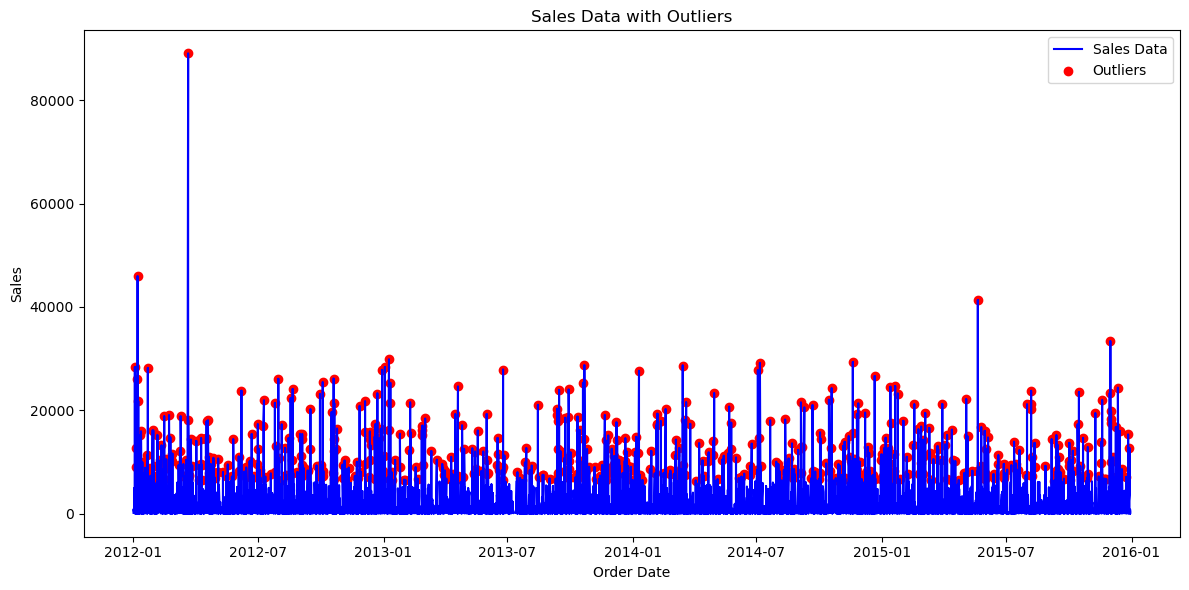

In [36]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(
    sales_data['Order Date'], 
    sales_data['Sales'], 
    color='blue', 
    label='Sales Data'
)
plt.scatter(
    sales_data.loc[sales_data['Outlier'], 'Order Date'], 
    sales_data.loc[sales_data['Outlier'], 'Sales'], 
    color='red', 
    label='Outliers'
)
plt.title('Sales Data with Outliers')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

## forecasting based on weather

In [2]:
import pandas as pd
data=pd.read_excel("walmart Retail Data.xlsx")

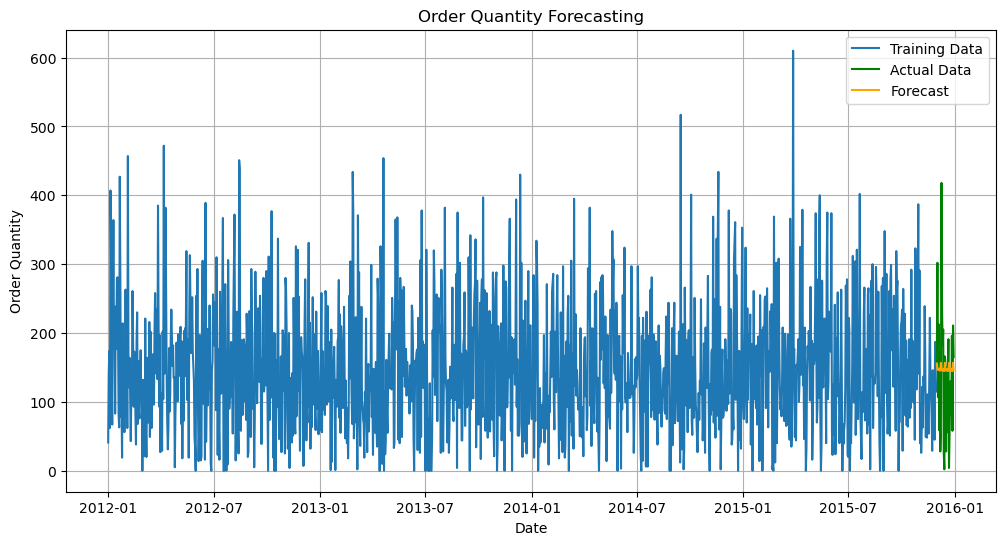

2015-12-01    155.719794
2015-12-02    148.042292
2015-12-03    146.460802
2015-12-04    148.203404
2015-12-05    146.486763
2015-12-06    145.543979
2015-12-07    145.727959
2015-12-08    156.692201
2015-12-09    146.019335
2015-12-10    146.104548
2015-12-11    145.237888
2015-12-12    147.650976
2015-12-13    145.327234
2015-12-14    144.845007
2015-12-15    156.664295
2015-12-16    146.077503
2015-12-17    146.114821
2015-12-18    145.323140
2015-12-19    147.617558
2015-12-20    145.333499
2015-12-21    144.870415
2015-12-22    156.665132
2015-12-23    146.075867
2015-12-24    146.114562
2015-12-25    145.320726
2015-12-26    147.618554
2015-12-27    145.333355
2015-12-28    144.869721
2015-12-29    156.665144
2015-12-30    146.075950
Freq: D, Name: predicted_mean, dtype: float64


In [3]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt



# Convert 'Order Date' to datetime and set it as the index
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)

# Aggregate data by date to get total order quantity per day
time_series_data = data['Order Quantity'].resample('D').sum()

# Split the data into training and testing sets
train_data = time_series_data[:-30]  # Use all but the last 30 days for training
test_data = time_series_data[-30:]   # Use the last 30 days for testing

# Define and fit the SARIMAX model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.forecast(steps=30)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Data', color='green')
plt.plot(forecast, label='Forecast', color='orange')
plt.legend()
plt.title('Order Quantity Forecasting')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.grid()
plt.show()

# Print the forecasted values
print(forecast)


## Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality

In [5]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.7 MB/s eta 0:00:09
   ---------------------------------------- 0.1/13.3 MB 1.4 MB/s eta 0:00:10
   ---------------------------------------- 0.1/13.3 MB 1.4 MB/s eta 0:00:10
    --------------------------------------- 0.2/13.3 MB 1.2 MB/s eta 0:00:11
    --------------------------------------- 0.3/13.3 MB 1.0 MB/s eta 0:00:13
    --------------------------------------- 0.3/13.3 MB 1.2 MB/s eta 0:00:12
    --------------------------------------- 0.3/13.3 MB 948.8 kB/s eta 0:00:14
   - -------------------------------------- 0.4/13.3 MB 1.0 MB/s eta 0:00:13
   - -------------------------------------- 0.4/13.3 MB 1.0 MB/s eta 0:00:13
   - -------------------------------------- 0.5/13.3 MB 1.0 MB/s eta 0:00:13
   - -------------------------------------- 0.5/13.3 MB 1.0 MB/s eta 0:00:13
   - -------------------------------------- 0.6/13.3 MB 1.1 MB/s eta 0:00:12
   

## data preprocessing

In [1]:
import pandas as pd
df=pd.read_excel("walmart Retail Data.xlsx")

In [2]:
df.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


In [3]:
df.isnull().sum()

City                      0
Customer Age            903
Customer Name             0
Customer Segment          0
Discount                  0
Number of Records         0
Order Date                0
Order ID                  0
Order Priority            0
Order Quantity            0
Product Base Margin      63
Product Category          0
Product Container         0
Product Name              0
Product Sub-Category      0
Profit                    0
Region                    0
Row ID                    0
Sales                     0
Ship Date                 0
Ship Mode                 0
Shipping Cost             0
State                     0
Unit Price                0
Zip Code                  0
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
if 'Customer Age' in df.columns:
    df['Customer Age'] = imputer.fit_transform(df[['Customer Age']])



In [6]:

categorical_columns = df.select_dtypes(include=['object']).columns
new_df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [7]:
new_df.isnull().sum()


Customer Age           0
Discount               0
Number of Records      0
Order Date             0
Order ID               0
                      ..
State_Virginia         0
State_Washington       0
State_West Virginia    0
State_Wisconsin        0
State_Wyoming          0
Length: 3573, dtype: int64

In [9]:
new_df.head()

,Customer Age,Discount,Number of Records,Order Date,Order ID,Order Quantity,Product Base Margin,Profit,Row ID,Sales,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,54.542823,0.10,1,2012-01-01,28774,32,0.68,-111.80,4031,180.36,...,False,False,False,False,False,False,False,False,False,False
1,54.542823,0.08,1,2012-01-01,13729,9,NaN,-342.91,1914,872.48,...,False,False,False,False,False,False,False,False,False,False
2,54.542823,0.00,1,2012-01-02,37537,4,0.56,-193.08,5272,1239.06,...,False,False,False,False,False,False,False,False,False,False
3,54.542823,0.08,1,2012-01-02,44069,43,0.39,247.79,6225,614.80,...,False,False,False,False,False,False,False,False,False,False
4,54.542823,0.07,1,2012-01-02,37537,43,0.69,-1049.85,5273,4083.19,...,False,False,False,False,False,False,False,False,False,False


17:58:27 - cmdstanpy - INFO - Chain [1] start processing
17:58:30 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1460,2016-10-23,2214.011297,-2257.960719,6656.964737
1461,2016-10-30,1858.747615,-2443.637778,6378.907538
1462,2016-11-06,1609.926611,-2998.439872,5984.526997
1463,2016-11-13,1757.087805,-2772.318221,6259.699474
1464,2016-11-20,2154.428759,-2350.747463,6618.527042
1465,2016-11-27,2386.755799,-2229.354719,7423.742197
1466,2016-12-04,2255.262255,-2333.990329,6753.783718
1467,2016-12-11,1996.449711,-2459.658232,6440.599425
1468,2016-12-18,1974.453608,-2788.051976,6735.685932
1469,2016-12-25,2231.302823,-2379.244960,7035.180067


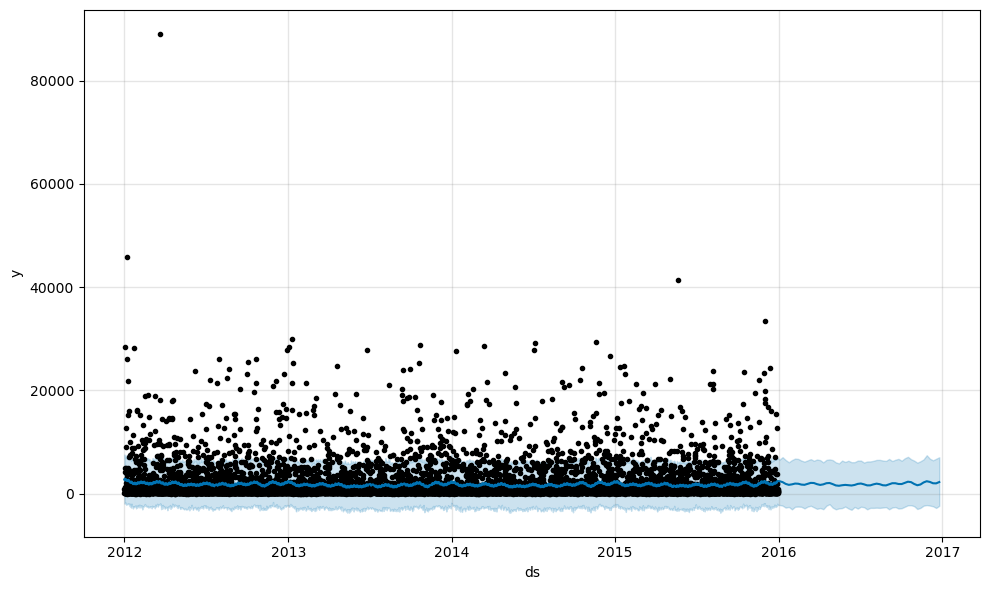

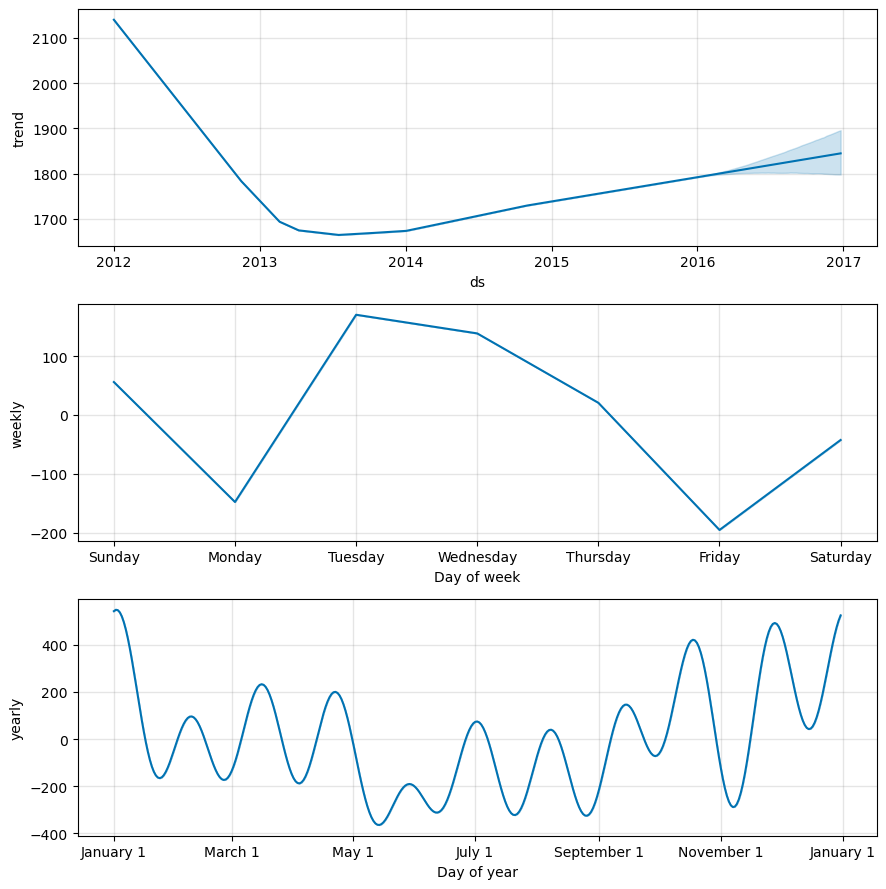

In [13]:
from prophet import Prophet
import pandas as pd


df_prophet = new_df[['Order Date', 'Sales']].copy()  
df_prophet.columns = ['ds', 'y']  
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])  

model = Prophet()
model.fit(df_prophet)


future_weeks = 52  # Number of weeks to predict
future = model.make_future_dataframe(periods=future_weeks, freq='W')  # Weekly predictions


forecast = model.predict(future)


model.plot(forecast)
model.plot_components(forecast)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)  # Show the last 10 predictions
